In [1]:
#!pip install --user -U pip

In [2]:
#!pip install --user umap-learn

In [3]:
#!pip install --user -U seaborn

In [105]:
#!pip install --user biopython

In [1]:
#!pip install --user bioframe

In [30]:
from Bio import SeqIO
import bioframe as bf
from collections import Counter
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from umap import UMAP

In [62]:
nucleotides = list("ACGT")
nucleotides

['A', 'C', 'G', 'T']

In [3]:
embedding_pos = np.load("example_embedding_1M_pos.1M.npy")
embedding_pos.shape

(1000000, 512)

In [4]:
embedding_neg = np.load("example_embedding_1M_neg.1M.npy")
embedding_neg.shape

(1000000, 512)

In [5]:
embedding = np.stack((embedding_pos, embedding_neg[::-1])).mean(axis=0)
embedding.shape

(1000000, 512)

In [6]:
N_PCS = 40
latent = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=N_PCS))
]).fit_transform(embedding)
latent.shape

(1000000, 40)

In [7]:
window_size = 1000000
center = 3566700

In [5]:
def plot_latent(latent, start, end, n_components=N_PCS):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center, :n_components]
    print(latent_zoom.shape)
    if latent_zoom.shape[1] == 512:  # redo PCA
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=40))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom.T)
    df2.index += 1
    df2.index = "PC" + df2.index.astype(str)
    #plt.figure(figsize=(15, 15))
    #plt.figure(figsize=(15, 5))
    plt.figure(figsize=(15, 3))
    sns.heatmap(
        data=df2,
        cmap="bwr",
        center=0,
        square=False,
        yticklabels=1,
        #cbar=False,
    )
    #plt.xlabel("pos")
    plt.xticks([], [])
    plt.yticks(rotation = 0)
    #plt.yticks([], [])
    plt.ylabel("Embedding principal component");
    return df2

NameError: name 'N_PCS' is not defined

(1000, 10)


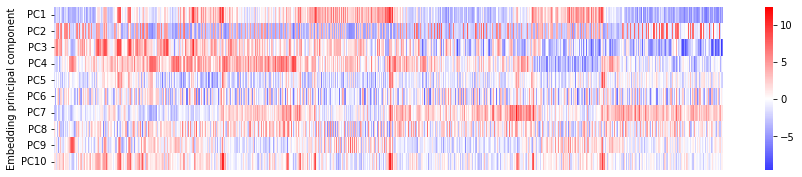

In [425]:
df2 = plot_latent(latent, 3567000, 3568000, n_components=10)
#plt.savefig("pca_viz_2.svg", bbox_inches="tight")

In [426]:
df2 = df2.T
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.573791,6.009903,1.441510,-0.906119,-3.365928,3.567182,-2.512040,-0.237265,-0.271341,0.865339
1,-3.554206,-1.750381,2.430971,-1.268034,-1.694460,0.370800,-2.963300,1.831575,-1.376737,1.352829
2,-3.242969,-1.169406,3.520899,-1.738497,-0.236123,-4.220421,-3.250630,-0.614544,-0.801978,1.499428
3,-1.077950,5.421076,4.406274,-1.443819,0.809997,-2.987339,-2.054230,-1.269703,-1.316379,-0.277377
4,-1.324801,4.777307,6.294000,-2.482119,-1.639841,-0.116738,-2.346587,0.072367,1.658515,-1.589739
...,...,...,...,...,...,...,...,...,...,...
995,-5.480726,-2.167558,-1.815990,-3.627140,-0.196936,0.077553,4.722043,-2.853843,2.120757,-1.436947
996,-4.714771,-0.917495,-5.397172,-1.669405,-0.071750,-0.053818,3.285444,-0.065674,-0.705663,2.568826
997,-3.540311,-0.001926,-9.542922,-1.158599,-2.018139,0.994767,1.286348,1.570420,-0.804793,0.747773
998,-4.774550,0.071391,-6.643457,0.226245,-2.393637,-0.409279,1.410330,-0.260228,0.863848,0.643992


In [434]:
df2["nucleotide"] = list(str(genome["Chr5"][3567000:3568000].seq))
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,nucleotide
0,-0.573791,6.009903,1.441510,-0.906119,-3.365928,3.567182,-2.512040,-0.237265,-0.271341,0.865339,G
1,-3.554206,-1.750381,2.430971,-1.268034,-1.694460,0.370800,-2.963300,1.831575,-1.376737,1.352829,A
2,-3.242969,-1.169406,3.520899,-1.738497,-0.236123,-4.220421,-3.250630,-0.614544,-0.801978,1.499428,A
3,-1.077950,5.421076,4.406274,-1.443819,0.809997,-2.987339,-2.054230,-1.269703,-1.316379,-0.277377,C
4,-1.324801,4.777307,6.294000,-2.482119,-1.639841,-0.116738,-2.346587,0.072367,1.658515,-1.589739,C
...,...,...,...,...,...,...,...,...,...,...,...
995,-5.480726,-2.167558,-1.815990,-3.627140,-0.196936,0.077553,4.722043,-2.853843,2.120757,-1.436947,T
996,-4.714771,-0.917495,-5.397172,-1.669405,-0.071750,-0.053818,3.285444,-0.065674,-0.705663,2.568826,T
997,-3.540311,-0.001926,-9.542922,-1.158599,-2.018139,0.994767,1.286348,1.570420,-0.804793,0.747773,T
998,-4.774550,0.071391,-6.643457,0.226245,-2.393637,-0.409279,1.410330,-0.260228,0.863848,0.643992,A


<AxesSubplot:xlabel='nucleotide', ylabel='PC2'>

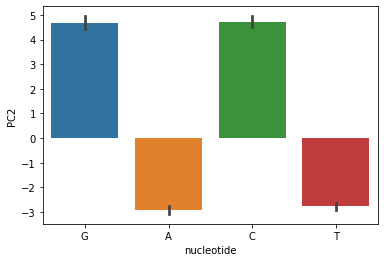

In [435]:
sns.barplot(data=df2, x="nucleotide", y="PC2")

<AxesSubplot:xlabel='nucleotide', ylabel='PC3'>

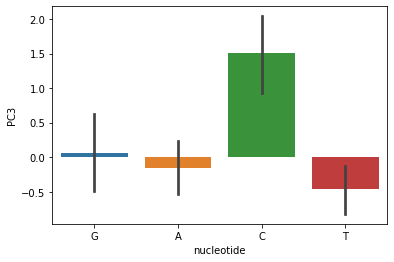

In [437]:
sns.barplot(data=df2, x="nucleotide", y="PC3")

<AxesSubplot:xlabel='nucleotide', ylabel='PC4'>

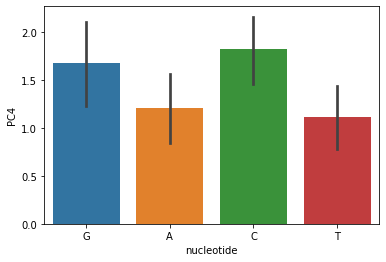

In [438]:
sns.barplot(data=df2, x="nucleotide", y="PC4")

In [ ]:
plt.hist()

In [90]:
def plot_latent_line(latent, start, end, n_components=N_PCS):
    latent_zoom = latent[window_size//2+start-center:window_size//2+end-center, :n_components]
    print(latent_zoom.shape)
    if latent_zoom.shape[1] == 512:  # redo PCA
        print("Running PCA on zoomed-in window")
        latent_zoom = latent = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=40))]).fit_transform(latent_zoom)
        print(latent_zoom.shape)
    
    df2 = pd.DataFrame(data=latent_zoom)
    df2.columns = "PC" + df2.columns.astype(str)
    df2["pos"] = df2.index
    df2 = pd.wide_to_long(df2, ["PC"], "pos", "pc_index").reset_index()
    df2.pc_index += 1
    
    plt.figure(figsize=(20, 5))
    #sns.heatmap(
    #    data=df2,
    #    cmap="bwr",
    #    center=0,
    #    square=False,
    #    yticklabels=1,
    #    cbar=False,
    #)
    
    g = sns.relplot(
        data=df2,
        x="pos",
        y="PC",
        row="pc_index",
        height=1,
        aspect=10,
        kind="line",
        facet_kws=dict(margin_titles=True),
    )
    g.set_titles(row_template="PC{row_name}")
    g.set(xticks=[], xlabel="")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    g.figure.subplots_adjust(hspace=0)
    
    #plt.xlabel("pos")
    #plt.xticks([], [])
    #plt.yticks([], [])
    #plt.ylabel("embedding principal component");

(1000, 10)


<Figure size 1440x360 with 0 Axes>

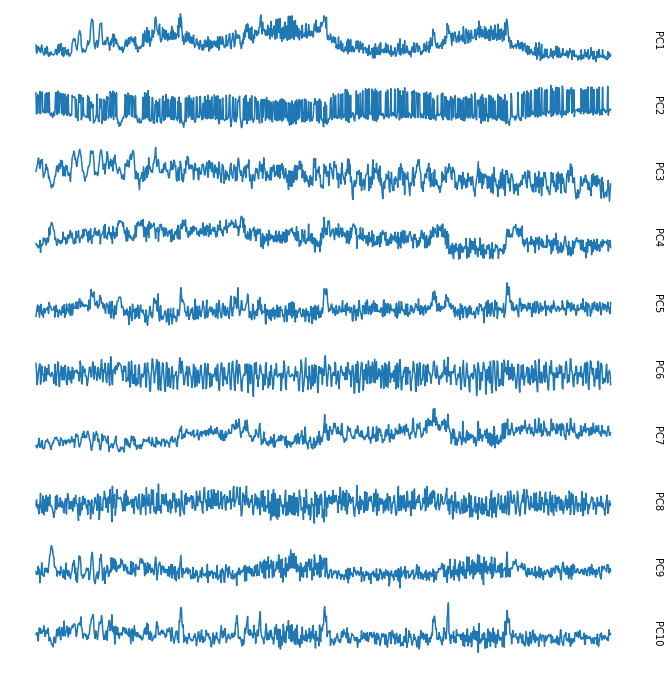

In [84]:
plot_latent_line(latent, 3567000, 3568000, n_components=10)

## Promoter, exons
TODO: find better example without something weird on the far left

http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3566700%2D3567700&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(1000, 40)


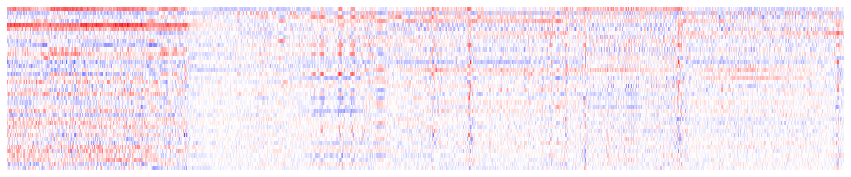

In [8]:
plot_latent(latent, 3566700, 3567700)

(1000, 512)
Running PCA on zoomed-in window
(1000, 40)


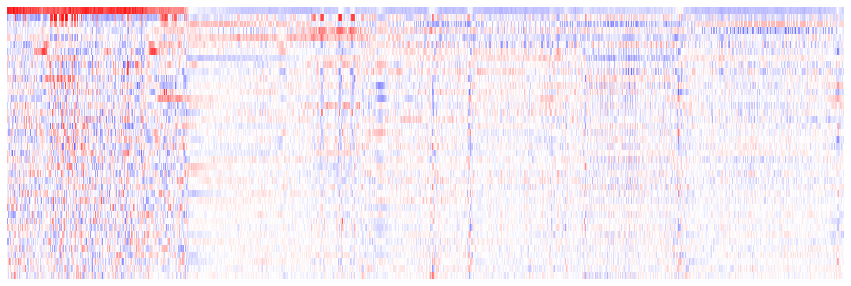

In [11]:
plot_latent(embedding, 3566700, 3567700)

# Example TFBS from FunTFBS
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3561938%2D3562102&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(164, 40)


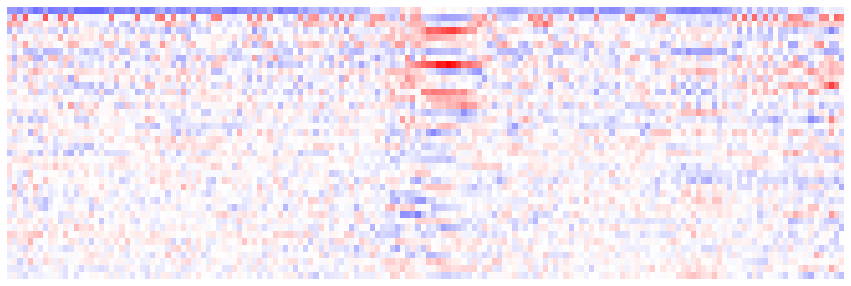

In [12]:
plot_latent(latent, 3561938, 3562102)

(164, 512)
Running PCA on zoomed-in window
(164, 40)


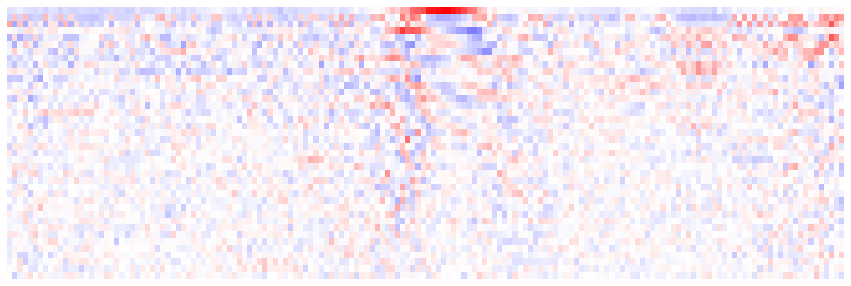

In [13]:
plot_latent(embedding, 3561938, 3562102)

## Start codon
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3567354%2D3567402&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(49, 40)


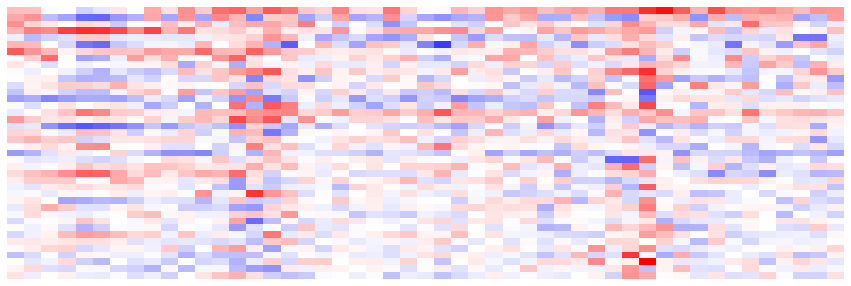

In [14]:
plot_latent(latent, 3567353, 3567402)

(49, 512)
Running PCA on zoomed-in window
(49, 40)


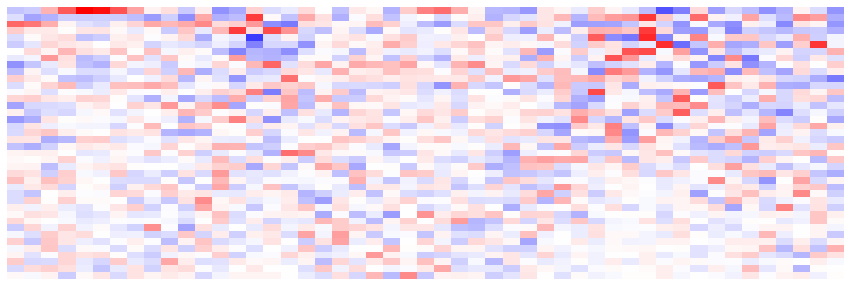

In [15]:
plot_latent(embedding, 3567353, 3567402)

## Alternative splicing
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3568832%2D3569781&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(950, 40)


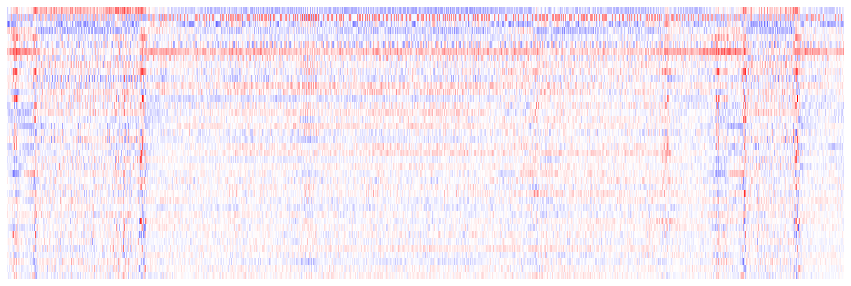

In [16]:
plot_latent(latent, 3568831, 3569781)

(950, 512)
Running PCA on zoomed-in window
(950, 40)


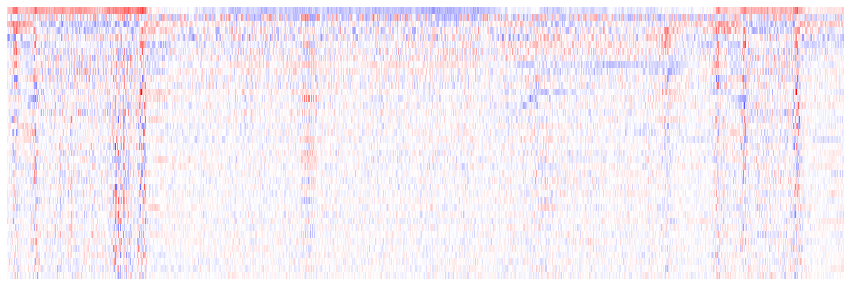

In [17]:
plot_latent(embedding, 3568831, 3569781)

## Gene on the negative strand. there's another thing interesting here, to inspect
http://ucsc.gao-lab.org/cgi-bin/hgTracks?db=tair10&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Chr5%3A3557971%2D3558946&hgsid=164617_9lNIGAWPpARSj47ipyGVNh4OanwR

(976, 40)


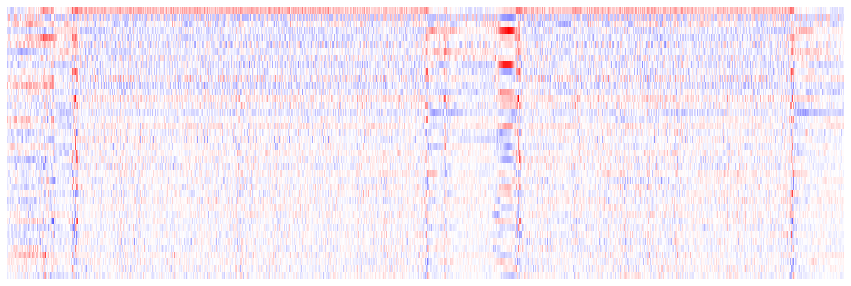

In [18]:
plot_latent(latent, 3557970, 3558946)

(976, 512)
Running PCA on zoomed-in window
(976, 40)


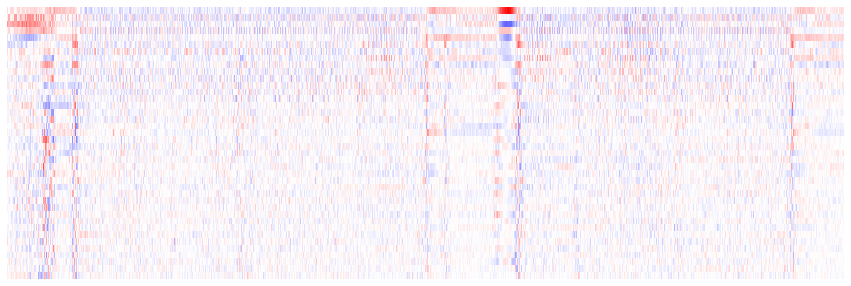

In [19]:
plot_latent(embedding, 3557970, 3558946)

In [20]:
"""
for pc in range(1, 21):
    df_bedgraph = pd.DataFrame({
        "chromosome": ["chr5" for _ in range(len(latent_zoom))],
        "start": np.arange(start, end),
        "end": np.arange(start+1, end+1),
        "values": latent_zoom[:, pc-1],
    })
    print(df_bedgraph)

    with open(f'example_bedgraph_PC{pc}.txt', 'a') as file:
        file.write(f'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n')
        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)
"""

'\nfor pc in range(1, 21):\n    df_bedgraph = pd.DataFrame({\n        "chromosome": ["chr5" for _ in range(len(latent_zoom))],\n        "start": np.arange(start, end),\n        "end": np.arange(start+1, end+1),\n        "values": latent_zoom[:, pc-1],\n    })\n    print(df_bedgraph)\n\n    with open(f\'example_bedgraph_PC{pc}.txt\', \'a\') as file:\n        file.write(f\'track type=bedGraph name="PC{pc}" description="PC{pc}" visibility=full color=255,0,0 altColor=0,0,255 maxHeightPixels=32\n\')\n        df_bedgraph.to_csv(file, sep="\t", header=False, index=False)\n'

## UMAP analysis

In [37]:
with gzip.open("../../data/mlm/genome/Arabidopsis_thaliana.fa.gz", "rt") as handle:
    genome = SeqIO.to_dict(SeqIO.parse(handle, "fasta"))
genome = {k: v.upper() for k, v in genome.items()}
genome

{'1': SeqRecord(seq=Seq('CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCC...GGG'), id='1', name='1', description='1 dna_sm:chromosome chromosome:TAIR10:1:1:30427671:1 REF', dbxrefs=[]),
 '2': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGG'), id='2', name='2', description='2 dna_sm:chromosome chromosome:TAIR10:2:1:19698289:1 REF', dbxrefs=[]),
 '3': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...CCC'), id='3', name='3', description='3 dna_sm:chromosome chromosome:TAIR10:3:1:23459830:1 REF', dbxrefs=[]),
 '4': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...AGG'), id='4', name='4', description='4 dna_sm:chromosome chromosome:TAIR10:4:1:18585056:1 REF', dbxrefs=[]),
 '5': SeqRecord(seq=Seq('TATACCATGTACCCTCAACCTTAAAACCCTAAAACCTATACTATAAATCTTTAA...ATC'), id='5', name='5', description='5 dna_sm:chromosome chromosome:TAIR10:5:1:26975502:1 REF', dbxrefs=[]),
 'Mt': SeqRecord(seq=Seq('GGATCCGTTCGAAA

In [275]:
gtf = pd.read_csv(
    "../../data/vep/tair10.gff", sep='\t', header=None, comment="#",
    names=['chrom', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'],
)
gtf = gtf[gtf.chrom=="Chr5"]
gtf.shape

(135017, 9)

In [276]:
# very careful with this, when defining overlaps
#gtf = gtf[gtf.strand=="+"]
#gtf.shape

In [277]:
# To work with the already computed 1Mb embeddings
gtf = gtf[(gtf.start > center-window_size//2) & (gtf.end < center+window_size//2)]
gtf.start -= (center-window_size//2)
gtf.end -= (center-window_size//2)
gtf.shape

(6455, 9)

In [278]:
transcripts = gtf[gtf.feature=="mRNA"]
transcripts["transcript_id"] = transcripts.attribute.str.split(";").str[0].str.split("=").str[1]
transcripts

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chrom,source,feature,start,end,score,strand,frame,attribute,transcript_id
473391,Chr5,TAIR10,mRNA,6656,11562,.,+,.,ID=AT5G09870.1;Parent=AT5G09870;Name=AT5G09870...,AT5G09870.1
473421,Chr5,TAIR10,mRNA,13287,13735,.,+,.,ID=AT5G09876.1;Parent=AT5G09876;Name=AT5G09876...,AT5G09876.1
473429,Chr5,TAIR10,mRNA,14742,18564,.,-,.,ID=AT5G09880.1;Parent=AT5G09880;Name=AT5G09880...,AT5G09880.1
473460,Chr5,TAIR10,mRNA,18845,22310,.,-,.,ID=AT5G09890.1;Parent=AT5G09890;Name=AT5G09890...,AT5G09890.1
473488,Chr5,TAIR10,mRNA,18845,22310,.,-,.,ID=AT5G09890.2;Parent=AT5G09890;Name=AT5G09890...,AT5G09890.2
...,...,...,...,...,...,...,...,...,...,...
479704,Chr5,TAIR10,mRNA,984105,986896,.,-,.,ID=AT5G12840.4;Parent=AT5G12840;Name=AT5G12840...,AT5G12840.4
479723,Chr5,TAIR10,mRNA,989487,992880,.,+,.,ID=AT5G12850.1;Parent=AT5G12850;Name=AT5G12850...,AT5G12850.1
479732,Chr5,TAIR10,mRNA,992986,995250,.,-,.,ID=AT5G12860.1;Parent=AT5G12860;Name=AT5G12860...,AT5G12860.1
479742,Chr5,TAIR10,mRNA,992986,995250,.,-,.,ID=AT5G12860.2;Parent=AT5G12860;Name=AT5G12860...,AT5G12860.2


In [279]:
gtf2 = gtf.query("feature == 'exon' and start >= 10000 and end <= 990000").copy()
gtf2

,chrom,source,feature,start,end,score,strand,frame,attribute
473415,Chr5,TAIR10,exon,10205,10555,.,+,.,Parent=AT5G09870.1
473417,Chr5,TAIR10,exon,10693,11562,.,+,.,Parent=AT5G09870.1
473423,Chr5,TAIR10,exon,13287,13639,.,+,.,Parent=AT5G09876.1
473426,Chr5,TAIR10,exon,13678,13735,.,+,.,Parent=AT5G09876.1
473433,Chr5,TAIR10,exon,18031,18564,.,-,.,Parent=AT5G09880.1
...,...,...,...,...,...,...,...,...,...
479714,Chr5,TAIR10,exon,985531,985628,.,-,.,Parent=AT5G12840.4
479716,Chr5,TAIR10,exon,985308,985379,.,-,.,Parent=AT5G12840.4
479718,Chr5,TAIR10,exon,984832,984996,.,-,.,Parent=AT5G12840.4
479721,Chr5,TAIR10,exon,984105,984650,.,-,.,Parent=AT5G12840.4


In [280]:
gtf2["transcript_id"] = gtf2.attribute.str.split("=").str[1]
gtf2.transcript_id.value_counts()

AT5G12370.3    25
AT5G12370.2    25
AT5G12370.1    25
AT5G11700.2    24
AT5G10470.2    23
               ..
AT5G11027.1     1
AT5G11070.1     1
AT5G12030.1     1
AT5G12020.1     1
AT5G12850.1     1
Name: transcript_id, Length: 379, dtype: int64

In [281]:
def get_first_intron(exons):
    if len(exons) < 2:
        return ""
    first_exons_idx = [0, 1] if (exons.strand == "+").any() else [-2, -1]
    first_exons = exons.sort_values("start").iloc[first_exons_idx]
    return first_exons.iloc[0].end, first_exons.iloc[1].start
    #raise Exception("debug")

first_introns = gtf2.groupby("transcript_id").apply(get_first_intron)
first_introns

transcript_id
AT5G09870.1      (10555, 10693)
AT5G09876.1      (13639, 13678)
AT5G09880.1      (17914, 18031)
AT5G09890.1      (21869, 21973)
AT5G09890.2      (21869, 21973)
                     ...       
AT5G12840.1    (986602, 986713)
AT5G12840.2    (986263, 986578)
AT5G12840.3    (986263, 986578)
AT5G12840.4    (986654, 986742)
AT5G12850.1                    
Length: 379, dtype: object

In [282]:
first_introns = first_introns[first_introns != ""]
first_introns

transcript_id
AT5G09870.1      (10555, 10693)
AT5G09876.1      (13639, 13678)
AT5G09880.1      (17914, 18031)
AT5G09890.1      (21869, 21973)
AT5G09890.2      (21869, 21973)
                     ...       
AT5G12480.2    (983355, 983648)
AT5G12840.1    (986602, 986713)
AT5G12840.2    (986263, 986578)
AT5G12840.3    (986263, 986578)
AT5G12840.4    (986654, 986742)
Length: 307, dtype: object

In [283]:
first_introns.drop_duplicates(inplace=True)

In [284]:
first_introns = first_introns.to_frame()

In [285]:
first_introns["chrom"] = "my_contig"
first_introns["start"] = first_introns[0].apply(lambda x: x[0])
first_introns["end"] = first_introns[0].apply(lambda x: x[1])
first_introns.drop(columns=0, inplace=True)
first_introns

,chrom,start,end
transcript_id,,,
AT5G09870.1,my_contig,10555,10693
AT5G09876.1,my_contig,13639,13678
AT5G09880.1,my_contig,17914,18031
AT5G09890.1,my_contig,21869,21973
AT5G09900.1,my_contig,25639,25732
...,...,...,...
AT5G12470.1,my_contig,979838,980042
AT5G12480.1,my_contig,983355,983648
AT5G12840.1,my_contig,986602,986713


In [286]:
# Experimental: shrink features to avoid sampling a position
# at the edge between and exon and intron, where local averaging
# might go wrong
#edge = 20
#gtf.start += edge
#gtf.end -= edge

In [287]:
gtf.feature.value_counts()

exon                         2417
CDS                          2287
protein                       369
mRNA                          367
five_prime_UTR                365
three_prime_UTR               337
gene                          291
tRNA                            7
transposable_element_gene       3
mRNA_TE_gene                    3
ncRNA                           2
miRNA                           2
pseudogenic_exon                2
snoRNA                          1
pseudogene                      1
pseudogenic_transcript          1
Name: feature, dtype: int64

In [288]:
gtf = gtf[gtf.feature != "protein"]  # redundant
gtf = gtf[gtf.feature != "gene"]  # redundant
gtf.shape

(5795, 9)

In [289]:
#gtf.head(100).tail(50)

In [290]:
#df['gene_id'] = df.attribute.str.extract(r'gene_id "([^;]*)";')
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)"')  # the filtered versions need this
#df['transcript_id'] = df.attribute.str.extract(r'transcript_id "([^;]*)";')

In [291]:
overlaps = pd.Series(["Intergenic"] * window_size)
i = -1
for row_index, row in gtf.iterrows():
    i += 1
    if i % 1000 == 0: print(i)
    if row.end > row.start:
        overlaps[row.start:row.end] += "," + row.feature
overlaps = overlaps.str.split(",").apply(Counter)

0
1000
2000
3000
4000
5000


In [292]:
overlaps.value_counts()

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                327987
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                260409
{'Intergenic': 1, 'mRNA': 1}                                     149308
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                 52858
{'Intergenic': 1, 'mRNA': 2}                                      47920
                                                                  ...  
{'Intergenic': 1, 'mRNA': 4, 'exon': 4, 'CDS': 1}                     1
{'Intergenic': 1, 'mRNA': 3, 'exon': 3, 'CDS': 1}                     1
{'Intergenic': 1, 'mRNA': 3, 'three_prime_UTR': 2, 'exon': 3}         1
{'Intergenic': 1, 'exon': 2}                                          1
{'Intergenic': 1, 'mRNA': 3, 'five_prime_UTR': 1, 'exon': 2}          1
Length: 88, dtype: int64

In [293]:
overlaps.value_counts()[:20]

TypeError: unhashable type: 'Counter'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Counter'


{'Intergenic': 1}                                                                  327987
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'CDS': 1}                                  260409
{'Intergenic': 1, 'mRNA': 1}                                                       149308
{'Intergenic': 1, 'mRNA': 2, 'CDS': 2, 'exon': 2}                                   52858
{'Intergenic': 1, 'mRNA': 2}                                                        47920
{'Intergenic': 1, 'mRNA': 1, 'exon': 1, 'three_prime_UTR': 1}                       40425
{'Intergenic': 1, 'mRNA': 3}                                                        22617
{'Intergenic': 1, 'mRNA': 3, 'CDS': 3, 'exon': 3}                                   20684
{'Intergenic': 1, 'mRNA': 1, 'five_prime_UTR': 1, 'exon': 1}                        19910
{'Intergenic': 1, 'mRNA': 4}                                                         7694
{'Intergenic': 1, 'mRNA': 2, 'three_prime_UTR': 2, 'exon': 2}                        6604
{'Intergen

In [294]:
segmentation = pd.Series([""] * window_size)
segmentation[overlaps==Counter(Intergenic=1)] = "Intergenic"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1)] = "Intron"  # technically should include all mRNA>=1
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, CDS=1)] = "CDS"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, five_prime_UTR=1)] = "5' UTR"
segmentation[overlaps==Counter(Intergenic=1, mRNA=1, exon=1, three_prime_UTR=1)] = "3' UTR"
# can comment this one out, not sure it's working
#segmentation[overlaps==Counter(Intergenic=1, mRNA=2, exon=1, CDS=1)] = "alt_spliced_cds"  # again, could do mRNA>=1, etc.
#segmentation[overlaps==Counter(Intergenic=1, ncRNA=2)] = "ncRNA"
segmentation.value_counts()

Intergenic    327987
CDS           260409
              201961
Intron        149308
3' UTR         40425
5' UTR         19910
dtype: int64

In [295]:
segmentation = segmentation[segmentation!=""]
border = 10000
segmentation = segmentation[border:-border]

In [317]:
segmentation_subset = segmentation.groupby(segmentation).sample(n=10000, random_state=42).to_frame().rename(columns={0: "Region"})
segmentation_subset = segmentation_subset.sample(frac=1, random_state=42)  # just shuffle
segmentation_subset["pos"] = segmentation_subset.index
segmentation_subset

,Region,pos
331479,Intergenic,331479
378768,3' UTR,378768
715973,3' UTR,715973
123546,5' UTR,123546
660166,Intergenic,660166
...,...,...
329195,5' UTR,329195
62160,Intron,62160
641023,Intergenic,641023
323899,3' UTR,323899


In [318]:
segmentation_subset["chrom"] = "Chr5"
segmentation_subset["start"] = segmentation_subset.pos
segmentation_subset["end"] = segmentation_subset.start + 1
original_idx = segmentation_subset.index.values
segmentation_subset = bf.closest(segmentation_subset, transcripts, suffixes=('','_2')).set_index("pos").loc[original_idx]
segmentation_subset

,Region,chrom,start,end,chrom_2,source_2,feature_2,start_2,end_2,score_2,strand_2,frame_2,attribute_2,transcript_id_2,distance
pos,,,,,,,,,,,,,,,
331479,Intergenic,Chr5,331479,331480,Chr5,TAIR10,mRNA,329775,331363,.,+,.,ID=AT5G10745.1;Parent=AT5G10745;Name=AT5G10745...,AT5G10745.1,116
378768,3' UTR,Chr5,378768,378769,Chr5,TAIR10,mRNA,378666,380414,.,-,.,ID=AT5G10930.1;Parent=AT5G10930;Name=AT5G10930...,AT5G10930.1,0
715973,3' UTR,Chr5,715973,715974,Chr5,TAIR10,mRNA,713611,716013,.,+,.,ID=AT5G11730.1;Parent=AT5G11730;Name=AT5G11730...,AT5G11730.1,0
123546,5' UTR,Chr5,123546,123547,Chr5,TAIR10,mRNA,120577,123551,.,-,.,ID=AT5G10170.1;Parent=AT5G10170;Name=AT5G10170...,AT5G10170.1,0
660166,Intergenic,Chr5,660166,660167,Chr5,TAIR10,mRNA,660834,662026,.,-,.,ID=AT5G11590.1;Parent=AT5G11590;Name=AT5G11590...,AT5G11590.1,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329195,5' UTR,Chr5,329195,329196,Chr5,TAIR10,mRNA,326869,329500,.,-,.,ID=AT5G10740.1;Parent=AT5G10740;Name=AT5G10740...,AT5G10740.1,0
62160,Intron,Chr5,62160,62161,Chr5,TAIR10,mRNA,61206,65027,.,+,.,ID=AT5G10010.1;Parent=AT5G10010;Name=AT5G10010...,AT5G10010.1,0
641023,Intergenic,Chr5,641023,641024,Chr5,TAIR10,mRNA,641309,642546,.,-,.,ID=AT5G11550.1;Parent=AT5G11550;Name=AT5G11550...,AT5G11550.1,285


In [319]:
segmentation_subset.groupby("Region").distance.mean()

Region
3' UTR             0.0
5' UTR             0.0
CDS                0.0
Intergenic    684.6823
Intron             0.0
Name: distance, dtype: Float64

In [320]:
aggregation = None#"mean"#"concat" #None
n_aggregation = 33#15 # None  # different categories benefit from different n_aggregation

In [321]:
segmentation_subset["nucleotide"] = segmentation_subset.apply(lambda row: genome["5"][row.name + center-window_size//2], axis=1)
segmentation_subset["nucleotide_window"] = segmentation_subset.apply(
    lambda row: str(genome["5"][row.name + center-window_size//2 - n_aggregation//2:row.name + center-window_size//2 + 1 + n_aggregation//2].seq),
    axis=1
)
segmentation_subset

,Region,chrom,start,end,chrom_2,source_2,feature_2,start_2,end_2,score_2,strand_2,frame_2,attribute_2,transcript_id_2,distance,nucleotide,nucleotide_window
pos,,,,,,,,,,,,,,,,,
331479,Intergenic,Chr5,331479,331480,Chr5,TAIR10,mRNA,329775,331363,.,+,.,ID=AT5G10745.1;Parent=AT5G10745;Name=AT5G10745...,AT5G10745.1,116,A,CTTGGTATTATGTGACAATTCTTATAAAAGCTT
378768,3' UTR,Chr5,378768,378769,Chr5,TAIR10,mRNA,378666,380414,.,-,.,ID=AT5G10930.1;Parent=AT5G10930;Name=AT5G10930...,AT5G10930.1,0,A,AAAAGAAGTAAAACCAAAATTTTATTAAACCAA
715973,3' UTR,Chr5,715973,715974,Chr5,TAIR10,mRNA,713611,716013,.,+,.,ID=AT5G11730.1;Parent=AT5G11730;Name=AT5G11730...,AT5G11730.1,0,C,TTTGGGACTATCTTTTCAGATGCATTATTGAAT
123546,5' UTR,Chr5,123546,123547,Chr5,TAIR10,mRNA,120577,123551,.,-,.,ID=AT5G10170.1;Parent=AT5G10170;Name=AT5G10170...,AT5G10170.1,0,T,TTTGCTCGAGTGCTTCTGAATGCATTGAGATTT
660166,Intergenic,Chr5,660166,660167,Chr5,TAIR10,mRNA,660834,662026,.,-,.,ID=AT5G11590.1;Parent=AT5G11590;Name=AT5G11590...,AT5G11590.1,667,A,TCCAAGTTATATGTGGAAATTAAATAGATGCTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329195,5' UTR,Chr5,329195,329196,Chr5,TAIR10,mRNA,326869,329500,.,-,.,ID=AT5G10740.1;Parent=AT5G10740;Name=AT5G10740...,AT5G10740.1,0,A,TATTCTTCGAATCAACAGATAATCTGCCCGGAA
62160,Intron,Chr5,62160,62161,Chr5,TAIR10,mRNA,61206,65027,.,+,.,ID=AT5G10010.1;Parent=AT5G10010;Name=AT5G10010...,AT5G10010.1,0,T,TGGTGTTATCTCATTATCAAAAATATCTTCAAT
641023,Intergenic,Chr5,641023,641024,Chr5,TAIR10,mRNA,641309,642546,.,-,.,ID=AT5G11550.1;Parent=AT5G11550;Name=AT5G11550...,AT5G11550.1,285,T,ACCTATAAAATTCAACTCAAAACCAATCGTATG


In [322]:
#features = embedding
features = latent  # works worse

In [323]:
if aggregation is None:
    embedding_subset = features[segmentation_subset.index.values]
elif aggregation == "concat":
    embedding_subset = features[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].reshape(len(segmentation_subset), -1)
elif aggregation == "mean":
    embedding_subset = features[[np.arange(i-n_aggregation//2, 1+i+n_aggregation//2) for i in segmentation_subset.index.values]].sum(axis=1)
embedding_subset.shape

(50000, 40)

In [324]:
"""k = 5#1
seqs = segmentation_subset.nucleotide_window.values

obj = kmer_featurization(k) 
kmer_features = obj.obtain_kmer_feature_for_a_list_of_sequences(seqs, write_number_of_occurrences=False)
kmer_features"""

'k = 5#1\nseqs = segmentation_subset.nucleotide_window.values\n\nobj = kmer_featurization(k) \nkmer_features = obj.obtain_kmer_feature_for_a_list_of_sequences(seqs, write_number_of_occurrences=False)\nkmer_features'

In [325]:
idx = slice(None)
#idx = np.where(segmentation_subset.nucleotide.isin(["G", "C"]))[0]
segmentation_subset = segmentation_subset.iloc[idx]

In [326]:
nucleotide_mean = {}
for nc in nucleotides:
    nucleotide_mean[nc] = embedding_subset[segmentation_subset.nucleotide==nc].mean(axis=0)

In [327]:
for i in range(len(embedding_subset)):
    embedding_subset[i] -= nucleotide_mean[segmentation_subset.iloc[i].nucleotide]

In [328]:
projector = Pipeline([
    ("scaler", StandardScaler()),  # not sure it's a good idea. yeah, they have very different variances.
    #("pca", PCA(n_components=100)),
    ("umap", UMAP(n_components=2, random_state=42)),  # n_neighbors should change with number of positions
])
segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(embedding_subset[idx])
#segmentation_subset[["UMAP1", "UMAP2"]] = projector.fit_transform(kmer_features)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

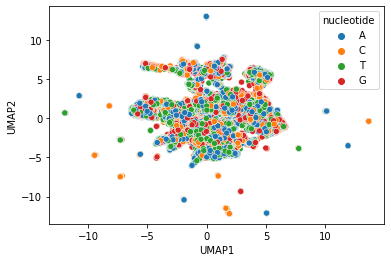

In [329]:
sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="nucleotide"
)

In [330]:
"""segmentation_subset["chrom"] = "my_contig"
segmentation_subset["start"] = segmentation_subset.index
segmentation_subset["end"] = segmentation_subset.start + 1
segmentation_subset = bf.coverage(segmentation_subset, first_introns)
segmentation_subset"""

'segmentation_subset["chrom"] = "my_contig"\nsegmentation_subset["start"] = segmentation_subset.index\nsegmentation_subset["end"] = segmentation_subset.start + 1\nsegmentation_subset = bf.coverage(segmentation_subset, first_introns)\nsegmentation_subset'

In [331]:
#segmentation_subset.groupby("Region").coverage.value_counts()

In [332]:
#segmentation_subset.loc[segmentation_subset.coverage > 0, "Region"] = "First intron"
#segmentation_subset.Region.value_counts()

In [333]:
#embedding_subset.std(axis=0)

In [334]:
region_order = ["CDS", "5' UTR", "3' UTR", "Intron", "Intergenic"]

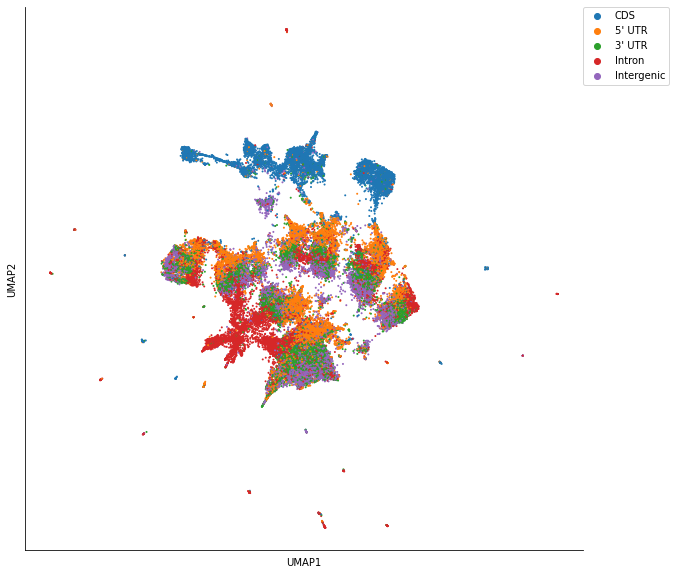

In [335]:
# could try plotting frame among the CDS, for example

plt.figure(figsize=(10, 10))
g = sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="Region",
    hue_order=region_order,
    s=4,
    linewidth=0,
)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.);
sns.despine()
plt.xticks([], [])
plt.yticks([], [])
#g.get_legend().set_title("Region")
plt.axis('equal');
#plt.savefig("umap_embedding.svg", bbox_inches="tight");

In [336]:
segmentation_subset.transcript_id_2.value_counts()

AT5G11530.1    697
AT5G12350.1    535
AT5G12400.1    530
AT5G11730.1    499
AT5G11060.1    494
              ... 
AT5G12210.2      3
AT5G12150.1      3
AT5G12370.3      2
AT5G10020.2      1
AT5G10605.1      1
Name: transcript_id_2, Length: 307, dtype: int64

In [342]:
segmentation_subset.transcript_id_2.value_counts().head(10).index.values

array(['AT5G11530.1', 'AT5G12350.1', 'AT5G12400.1', 'AT5G11730.1',
       'AT5G11060.1', 'AT5G12430.1', 'AT5G10010.1', 'AT5G10720.1',
       'AT5G11670.1', 'AT5G09970.1'], dtype=object)

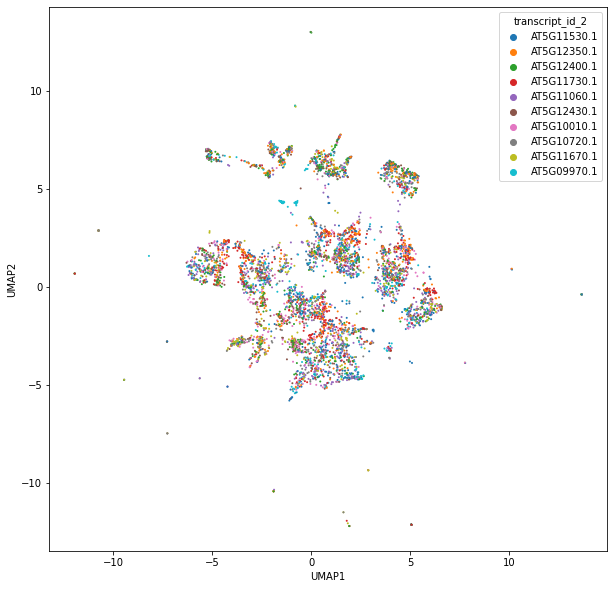

In [344]:
txs = segmentation_subset.transcript_id_2.value_counts().head(10).index.values

plt.figure(figsize=(10, 10))
g = sns.scatterplot(
    data=segmentation_subset[segmentation_subset.transcript_id_2.isin(txs)],
    x="UMAP1",
    y="UMAP2",
    hue="transcript_id_2",
    hue_order=txs,
    s=4,
    linewidth=0,
)

In [347]:
from sklearn.cluster import KMeans
segmentation_subset["cluster"] = KMeans().fit_predict(embedding_subset).astype(str)
segmentation_subset

,Region,chrom,start,end,chrom_2,source_2,feature_2,start_2,end_2,score_2,strand_2,frame_2,attribute_2,transcript_id_2,distance,nucleotide,nucleotide_window,UMAP1,UMAP2,cluster
pos,,,,,,,,,,,,,,,,,,,,
331479,Intergenic,Chr5,331479,331480,Chr5,TAIR10,mRNA,329775,331363,.,+,.,ID=AT5G10745.1;Parent=AT5G10745;Name=AT5G10745...,AT5G10745.1,116,A,CTTGGTATTATGTGACAATTCTTATAAAAGCTT,4.041771,0.845795,0
378768,3' UTR,Chr5,378768,378769,Chr5,TAIR10,mRNA,378666,380414,.,-,.,ID=AT5G10930.1;Parent=AT5G10930;Name=AT5G10930...,AT5G10930.1,0,A,AAAAGAAGTAAAACCAAAATTTTATTAAACCAA,1.680148,-3.065790,2
715973,3' UTR,Chr5,715973,715974,Chr5,TAIR10,mRNA,713611,716013,.,+,.,ID=AT5G11730.1;Parent=AT5G11730;Name=AT5G11730...,AT5G11730.1,0,C,TTTGGGACTATCTTTTCAGATGCATTATTGAAT,5.602551,-1.005854,6
123546,5' UTR,Chr5,123546,123547,Chr5,TAIR10,mRNA,120577,123551,.,-,.,ID=AT5G10170.1;Parent=AT5G10170;Name=AT5G10170...,AT5G10170.1,0,T,TTTGCTCGAGTGCTTCTGAATGCATTGAGATTT,4.178034,1.702231,0
660166,Intergenic,Chr5,660166,660167,Chr5,TAIR10,mRNA,660834,662026,.,-,.,ID=AT5G11590.1;Parent=AT5G11590;Name=AT5G11590...,AT5G11590.1,667,A,TCCAAGTTATATGTGGAAATTAAATAGATGCTC,-0.375802,-0.946165,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329195,5' UTR,Chr5,329195,329196,Chr5,TAIR10,mRNA,326869,329500,.,-,.,ID=AT5G10740.1;Parent=AT5G10740;Name=AT5G10740...,AT5G10740.1,0,A,TATTCTTCGAATCAACAGATAATCTGCCCGGAA,4.599685,2.085112,2
62160,Intron,Chr5,62160,62161,Chr5,TAIR10,mRNA,61206,65027,.,+,.,ID=AT5G10010.1;Parent=AT5G10010;Name=AT5G10010...,AT5G10010.1,0,T,TGGTGTTATCTCATTATCAAAAATATCTTCAAT,-3.121192,-0.547745,6
641023,Intergenic,Chr5,641023,641024,Chr5,TAIR10,mRNA,641309,642546,.,-,.,ID=AT5G11550.1;Parent=AT5G11550;Name=AT5G11550...,AT5G11550.1,285,T,ACCTATAAAATTCAACTCAAAACCAATCGTATG,0.016565,1.032779,1


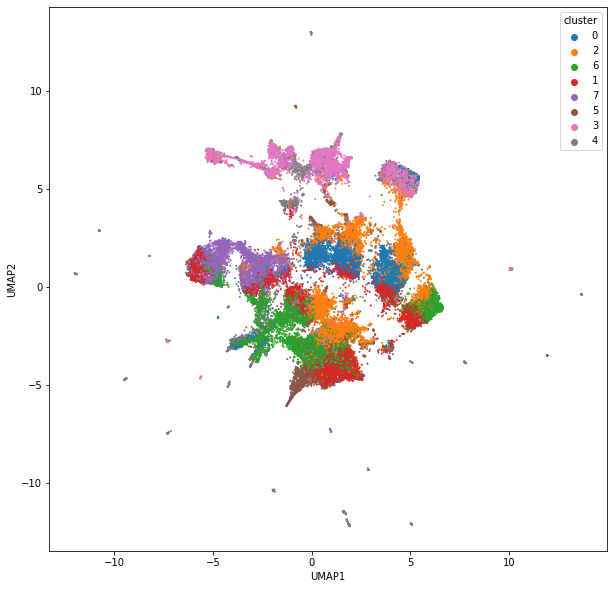

In [348]:
plt.figure(figsize=(10, 10))
g = sns.scatterplot(
    data=segmentation_subset,
    x="UMAP1",
    y="UMAP2",
    hue="cluster",
    s=4,
    linewidth=0,
)

<AxesSubplot:xlabel='cluster', ylabel='count'>

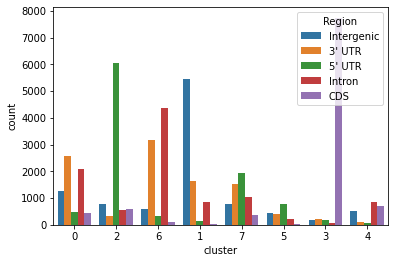

In [351]:
sns.countplot(
    data=segmentation_subset,
    x="cluster",
    hue="Region",
)

In [352]:
# TODO: maybe try hierarchical clustering?

## Correlation analysis

In [353]:
gtf

,chrom,source,feature,start,end,score,strand,frame,attribute
473306,Chr5,TAIR10,CDS,115,117,.,+,0,"Parent=AT5G09860.1,AT5G09860.1-Protein;"
473307,Chr5,TAIR10,exon,217,300,.,+,.,Parent=AT5G09860.1
473308,Chr5,TAIR10,CDS,217,300,.,+,0,"Parent=AT5G09860.1,AT5G09860.1-Protein;"
473309,Chr5,TAIR10,exon,377,451,.,+,.,Parent=AT5G09860.1
473310,Chr5,TAIR10,CDS,377,451,.,+,0,"Parent=AT5G09860.1,AT5G09860.1-Protein;"
...,...,...,...,...,...,...,...,...,...
479758,Chr5,TAIR10,CDS,997959,998239,.,-,0,"Parent=AT5G12870.1,AT5G12870.1-Protein;"
479759,Chr5,TAIR10,exon,997959,998292,.,-,.,Parent=AT5G12870.1
479760,Chr5,TAIR10,CDS,996239,996800,.,-,1,"Parent=AT5G12870.1,AT5G12870.1-Protein;"
479761,Chr5,TAIR10,three_prime_UTR,996024,996238,.,-,.,Parent=AT5G12870.1


In [354]:
gtf.feature.value_counts()

exon                         2417
CDS                          2287
mRNA                          367
five_prime_UTR                365
three_prime_UTR               337
tRNA                            7
transposable_element_gene       3
mRNA_TE_gene                    3
ncRNA                           2
miRNA                           2
pseudogenic_exon                2
snoRNA                          1
pseudogene                      1
pseudogenic_transcript          1
Name: feature, dtype: int64

In [403]:
# could add to the annotation the funtfbs, just concat
annotation_features = gtf.feature.unique()#value_counts().head(8).index.values
annotation_features

array(['CDS', 'exon', 'three_prime_UTR', 'mRNA', 'five_prime_UTR', 'tRNA',
       'ncRNA', 'snoRNA', 'transposable_element_gene', 'mRNA_TE_gene',
       'miRNA', 'pseudogene', 'pseudogenic_transcript',
       'pseudogenic_exon'], dtype=object)

In [404]:
intervals = {}
for f in annotation_features:
    intervals[f] = bf.merge(gtf[gtf.feature==f])

In [409]:
data = pd.DataFrame(dict(start=np.arange(len(embedding)))) 
# TODO: be careful of +-1 indexing errors
data["end"] = data.start + 1
data["chrom"] = "Chr5"
data

,start,end,chrom
0,0,1,Chr5
1,1,2,Chr5
2,2,3,Chr5
3,3,4,Chr5
4,4,5,Chr5
...,...,...,...
999995,999995,999996,Chr5
999996,999996,999997,Chr5
999997,999997,999998,Chr5
999998,999998,999999,Chr5


In [411]:
for f in annotation_features:
    data = bf.coverage(data, intervals[f])
    data.coverage = data.coverage.clip(0, 1)
    data.rename(columns=dict(coverage=f), inplace=True)
data

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,snoRNA,transposable_element_gene,mRNA_TE_gene,miRNA,pseudogene,pseudogenic_transcript,pseudogenic_exon
0,0,1,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999996,999996,999997,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999997,999997,999998,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999998,999998,999999,Chr5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [412]:
data[annotation_features].mean()

CDS                          0.350164
exon                         0.441308
three_prime_UTR              0.058038
mRNA                         0.658623
five_prime_UTR               0.029360
tRNA                         0.000519
ncRNA                        0.004482
snoRNA                       0.000132
transposable_element_gene    0.005921
mRNA_TE_gene                 0.005921
miRNA                        0.000180
pseudogene                   0.000676
pseudogenic_transcript       0.000676
pseudogenic_exon             0.000443
dtype: float64

In [413]:
n_pcs = 40
pcs = np.arange(n_pcs)

In [414]:
data.loc[:, pcs] = latent[:, :n_pcs]
data

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,30,31,32,33,34,35,36,37,38,39
0,0,1,Chr5,0,0,0,0,0,0,0,...,-2.358121,0.712073,-0.950514,0.526773,-0.175083,-0.764289,0.249556,0.115611,0.554959,0.589229
1,1,2,Chr5,0,0,0,0,0,0,0,...,-1.588170,0.756946,0.283574,-0.783952,2.520730,0.276294,-0.051267,-0.321374,-1.087651,-0.738611
2,2,3,Chr5,0,0,0,0,0,0,0,...,0.308093,0.441875,0.234778,-1.044889,0.516632,-1.009655,1.279221,0.856556,0.946851,-0.991507
3,3,4,Chr5,0,0,0,0,0,0,0,...,-0.269257,0.100542,-0.460458,-2.775196,-0.144680,-2.214485,0.201702,-0.938874,2.392057,-1.107705
4,4,5,Chr5,0,0,0,0,0,0,0,...,-0.032298,-0.047459,0.630631,-2.928830,1.299786,-0.795617,0.840993,0.668070,-1.362686,-0.141550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,Chr5,0,0,0,0,0,0,0,...,-1.832856,1.947304,-1.709038,1.786756,2.368179,-1.882302,-1.289365,-0.029063,0.930450,-0.897367
999996,999996,999997,Chr5,0,0,0,0,0,0,0,...,-0.592036,0.937474,1.055952,0.683549,-0.908981,-1.396526,-1.249965,1.174262,0.537703,-0.377596
999997,999997,999998,Chr5,0,0,0,0,0,0,0,...,2.147378,0.530730,-0.577683,0.448981,0.711662,-1.262944,-1.301859,1.096223,-1.018423,-0.638121
999998,999998,999999,Chr5,0,0,0,0,0,0,0,...,0.093699,0.641531,-1.168807,0.679826,0.243709,-1.364827,0.464892,1.006120,1.145317,1.470867


In [ ]:
ce

In [416]:
data["nucleotide"] = list(str(genome["5"][center-window_size//2:center+window_size//2].seq))
data

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,31,32,33,34,35,36,37,38,39,nucleotide
0,0,1,Chr5,0,0,0,0,0,0,0,...,0.712073,-0.950514,0.526773,-0.175083,-0.764289,0.249556,0.115611,0.554959,0.589229,T
1,1,2,Chr5,0,0,0,0,0,0,0,...,0.756946,0.283574,-0.783952,2.520730,0.276294,-0.051267,-0.321374,-1.087651,-0.738611,C
2,2,3,Chr5,0,0,0,0,0,0,0,...,0.441875,0.234778,-1.044889,0.516632,-1.009655,1.279221,0.856556,0.946851,-0.991507,A
3,3,4,Chr5,0,0,0,0,0,0,0,...,0.100542,-0.460458,-2.775196,-0.144680,-2.214485,0.201702,-0.938874,2.392057,-1.107705,A
4,4,5,Chr5,0,0,0,0,0,0,0,...,-0.047459,0.630631,-2.928830,1.299786,-0.795617,0.840993,0.668070,-1.362686,-0.141550,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999996,Chr5,0,0,0,0,0,0,0,...,1.947304,-1.709038,1.786756,2.368179,-1.882302,-1.289365,-0.029063,0.930450,-0.897367,T
999996,999996,999997,Chr5,0,0,0,0,0,0,0,...,0.937474,1.055952,0.683549,-0.908981,-1.396526,-1.249965,1.174262,0.537703,-0.377596,C
999997,999997,999998,Chr5,0,0,0,0,0,0,0,...,0.530730,-0.577683,0.448981,0.711662,-1.262944,-1.301859,1.096223,-1.018423,-0.638121,G
999998,999998,999999,Chr5,0,0,0,0,0,0,0,...,0.641531,-1.168807,0.679826,0.243709,-1.364827,0.464892,1.006120,1.145317,1.470867,C


In [421]:
mean_pcs = data.groupby("nucleotide")[pcs].mean()
mean_pcs

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
nucleotide,,,,,,,,,,,,,,,,,,,,,
A,-1.290451,-2.595569,-0.205062,-0.110030,-0.114090,-0.006699,-0.013491,0.070140,0.019911,0.157022,...,-0.009695,0.006237,0.018262,-0.033678,-0.017102,-0.015445,-0.014710,-0.000637,0.002326,-0.028578
C,2.265375,4.479148,0.350394,0.229736,0.242313,0.034060,0.082546,-0.113429,-0.010060,-0.275791,...,0.018594,-0.010819,-0.007970,0.075884,0.024332,0.046160,0.028505,-0.001732,-0.021497,0.039905
G,2.184806,4.516558,0.373682,0.224924,0.184441,0.012921,0.056490,-0.115956,-0.031599,-0.296659,...,0.000749,-0.001104,-0.016057,0.068844,0.017508,0.030651,0.023993,0.003939,-0.032277,0.048931
T,-1.275762,-2.591974,-0.212542,-0.152469,-0.132153,-0.020499,-0.067081,0.062081,0.003992,0.173206,...,-0.001405,0.000601,-0.004573,-0.049901,-0.006955,-0.028952,-0.015571,-0.000634,0.028874,-0.022606


In [425]:
data[pcs] = data[pcs] - mean_pcs.loc[data.nucleotide].values

In [435]:
#data["cluster"] = KMeans(n_clusters=20, n_init=100, random_state=42).fit_predict(data[pcs]).astype(str)

KeyboardInterrupt: 

In [438]:
data_subset = data.sample(n=300000, random_state=42)
data_subset

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,31,32,33,34,35,36,37,38,39,nucleotide
987231,987231,987232,Chr5,0,0,0,0,0,0,0,...,-0.093461,0.390257,-0.184742,1.211088,-0.859433,-0.490923,1.159828,-2.307558,-1.015837,G
79954,79954,79955,Chr5,0,0,0,1,0,0,0,...,1.072946,0.346784,0.561880,-0.151201,0.078894,1.133877,-0.126926,0.363619,0.424589,A
567130,567130,567131,Chr5,0,0,0,1,0,0,0,...,-2.636995,-0.434494,-1.160764,1.123380,-0.595101,0.465398,-1.455604,0.849115,0.551429,A
500891,500891,500892,Chr5,0,0,0,1,0,0,0,...,0.876403,-0.143923,-0.296141,-3.172767,-0.908731,-1.874104,-0.806037,-0.235392,2.887812,C
55399,55399,55400,Chr5,0,0,0,0,0,0,0,...,-1.528098,0.153429,0.584841,1.763577,0.866494,-1.404309,2.791454,-1.418540,-1.390683,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463299,463299,463300,Chr5,0,0,0,0,0,0,0,...,-0.345807,1.370208,-1.161182,0.451274,0.682794,0.331327,-0.406276,0.898876,0.636290,A
728324,728324,728325,Chr5,0,0,0,1,0,0,0,...,0.338228,2.243634,-0.732405,-0.305946,0.085338,-0.967285,-0.632990,-1.026298,0.444691,A
76260,76260,76261,Chr5,0,0,0,1,0,0,0,...,-3.690454,0.698987,-0.758276,0.169889,-3.223986,1.732122,2.315105,-0.529973,-1.110500,T
77813,77813,77814,Chr5,1,1,0,1,0,0,0,...,2.221086,0.972497,-1.299588,-2.340309,0.113928,-2.052064,0.760048,1.564924,1.092863,C


In [439]:
data_subset[["UMAP1", "UMAP2"]] = UMAP(random_state=42).fit_transform(data_subset[pcs])
data_subset

,start,end,chrom,CDS,exon,three_prime_UTR,mRNA,five_prime_UTR,tRNA,ncRNA,...,33,34,35,36,37,38,39,nucleotide,UMAP1,UMAP2
987231,987231,987232,Chr5,0,0,0,0,0,0,0,...,-0.184742,1.211088,-0.859433,-0.490923,1.159828,-2.307558,-1.015837,G,-6.437586,-4.121195
79954,79954,79955,Chr5,0,0,0,1,0,0,0,...,0.561880,-0.151201,0.078894,1.133877,-0.126926,0.363619,0.424589,A,7.908453,-1.852996
567130,567130,567131,Chr5,0,0,0,1,0,0,0,...,-1.160764,1.123380,-0.595101,0.465398,-1.455604,0.849115,0.551429,A,-3.766204,-1.720654
500891,500891,500892,Chr5,0,0,0,1,0,0,0,...,-0.296141,-3.172767,-0.908731,-1.874104,-0.806037,-0.235392,2.887812,C,-2.262095,0.933779
55399,55399,55400,Chr5,0,0,0,0,0,0,0,...,0.584841,1.763577,0.866494,-1.404309,2.791454,-1.418540,-1.390683,T,1.049341,-8.055316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463299,463299,463300,Chr5,0,0,0,0,0,0,0,...,-1.161182,0.451274,0.682794,0.331327,-0.406276,0.898876,0.636290,A,-4.376467,6.690876
728324,728324,728325,Chr5,0,0,0,1,0,0,0,...,-0.732405,-0.305946,0.085338,-0.967285,-0.632990,-1.026298,0.444691,A,8.633216,-1.561254
76260,76260,76261,Chr5,0,0,0,1,0,0,0,...,-0.758276,0.169889,-3.223986,1.732122,2.315105,-0.529973,-1.110500,T,-5.237845,-3.501006
77813,77813,77814,Chr5,1,1,0,1,0,0,0,...,-1.299588,-2.340309,0.113928,-2.052064,0.760048,1.564924,1.092863,C,5.919032,1.505908


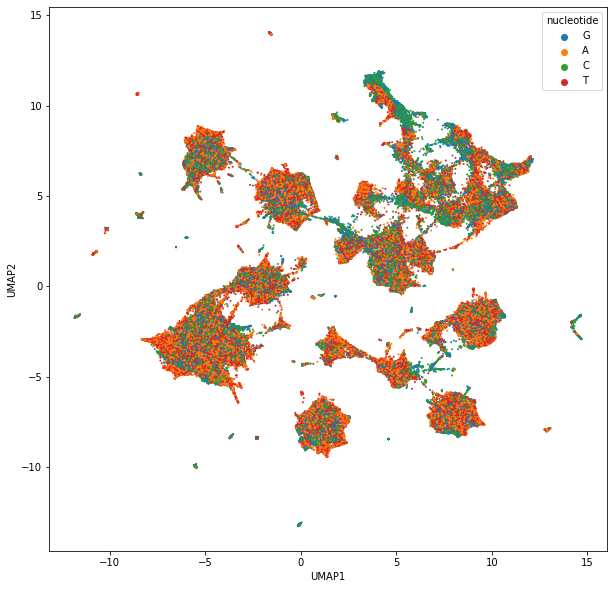

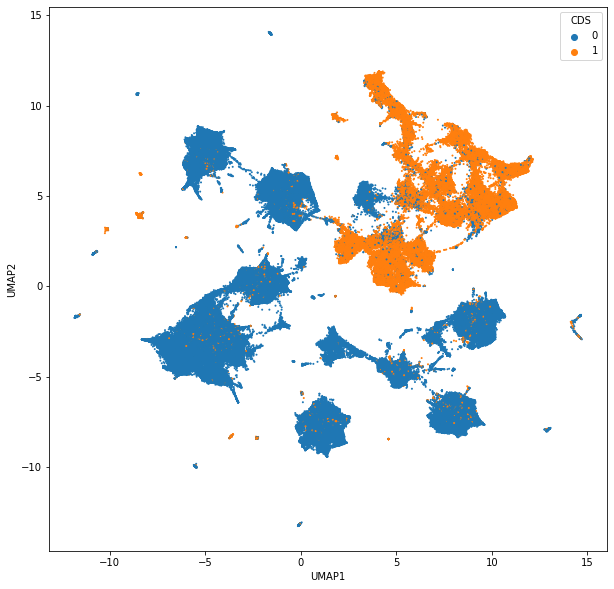

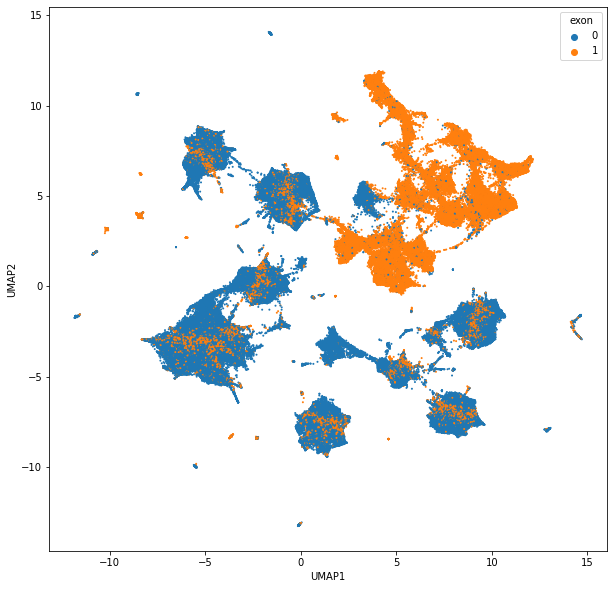

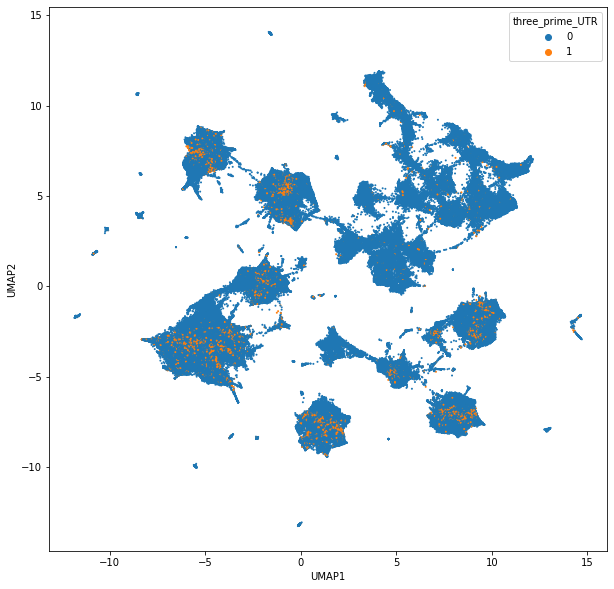

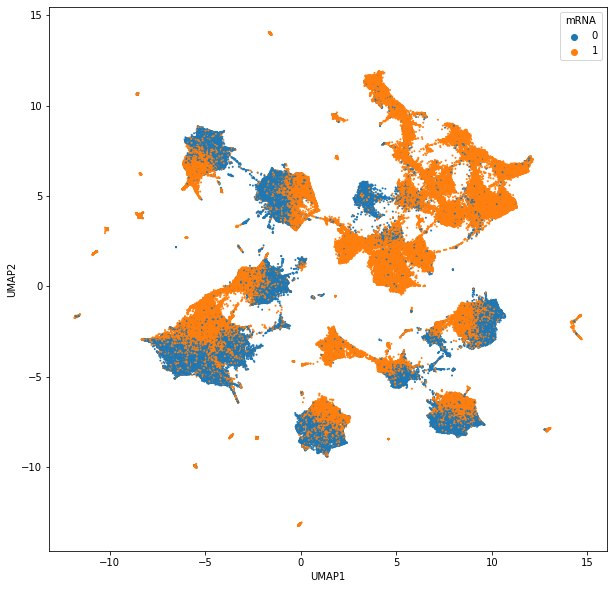

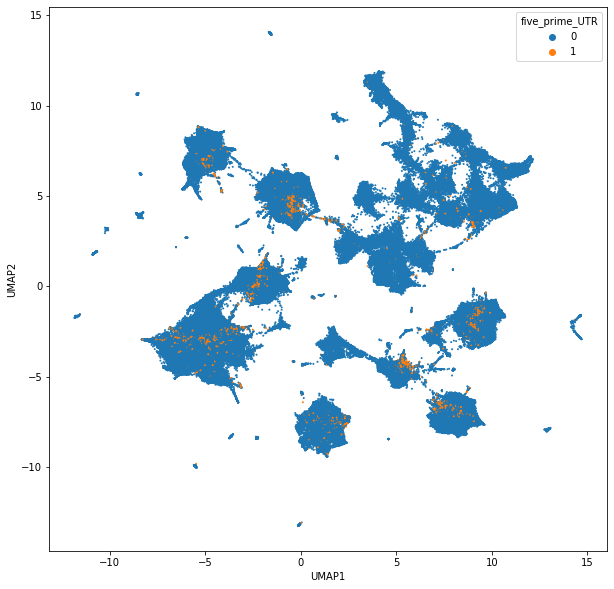

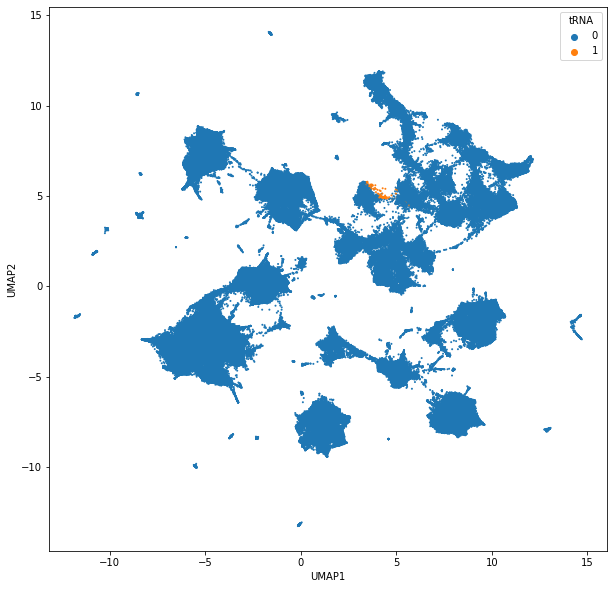

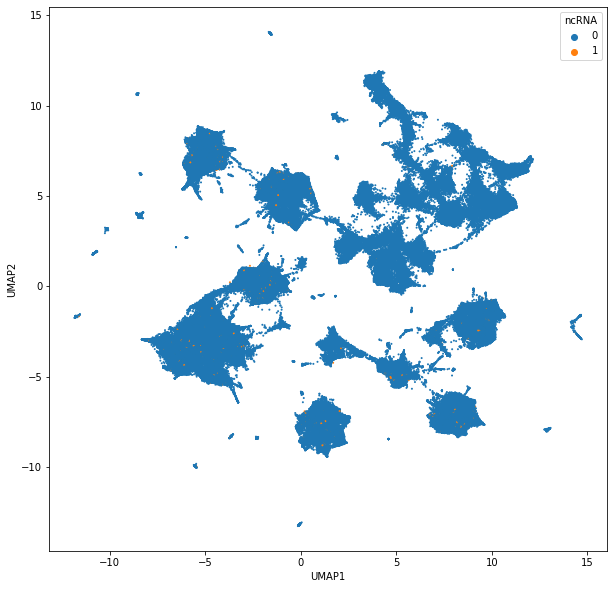

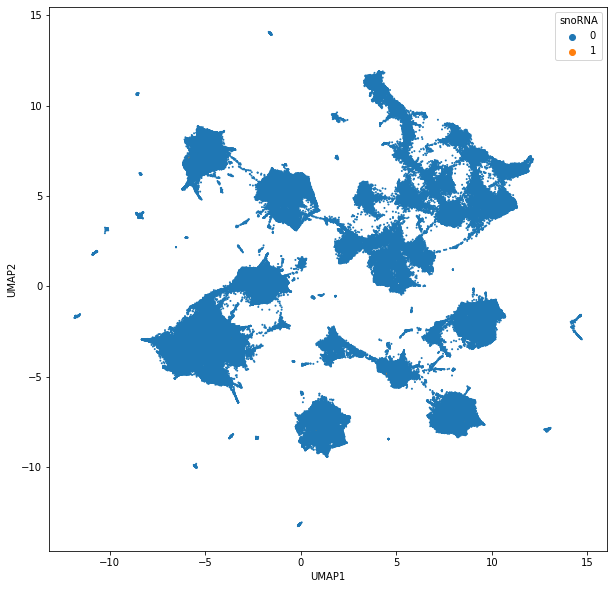

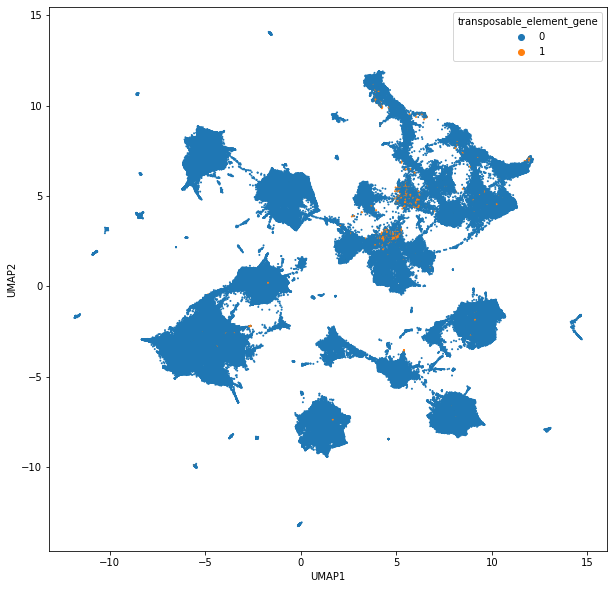

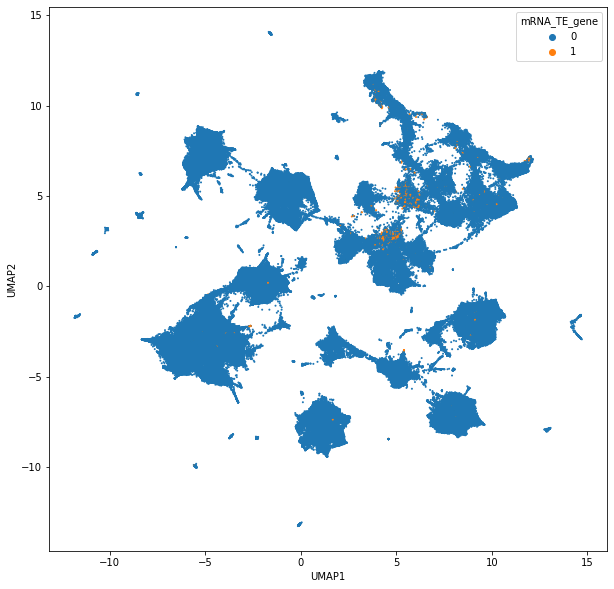

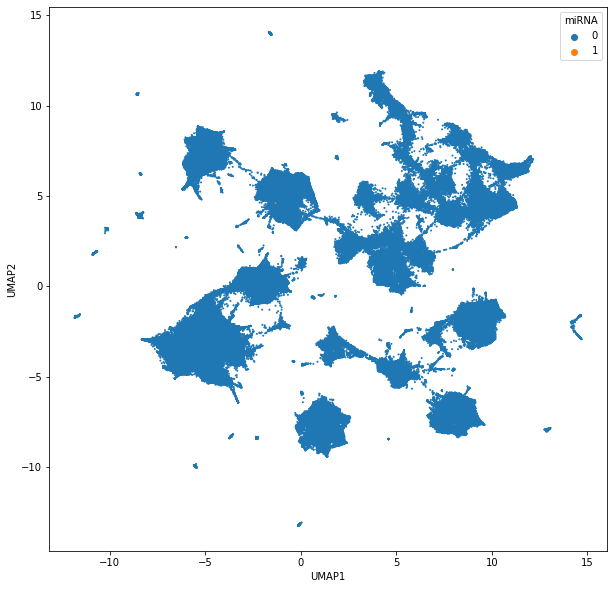

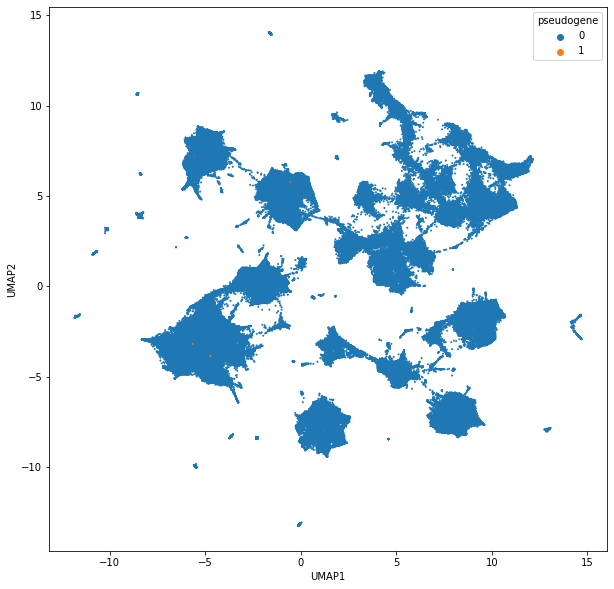

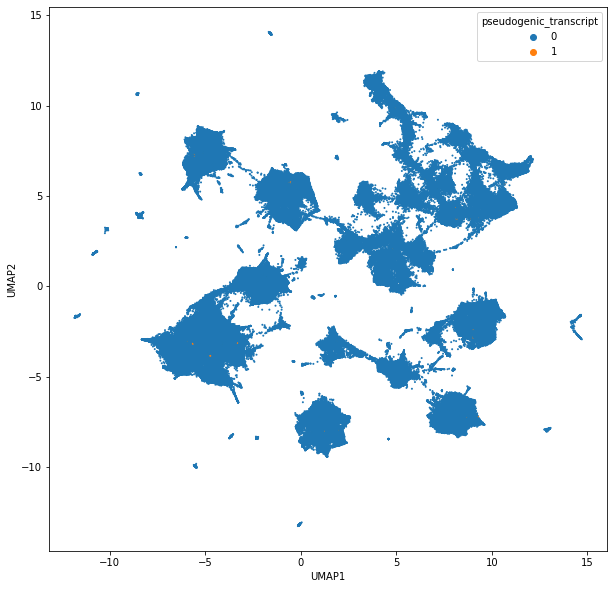

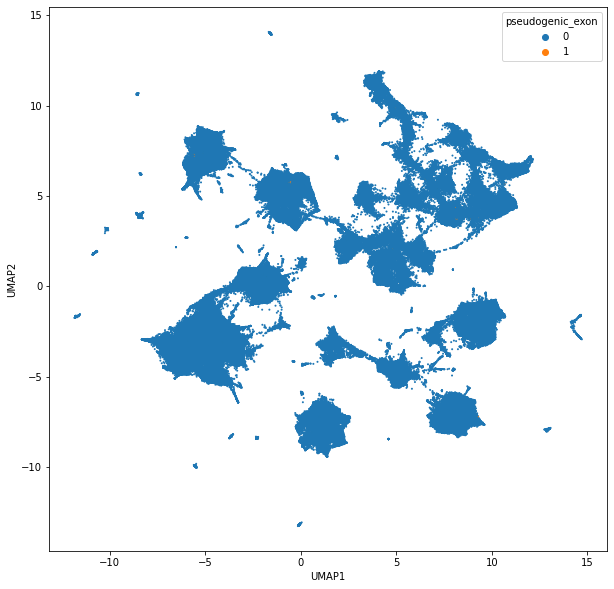

In [440]:
plot_features = np.concatenate([["nucleotide"], annotation_features])

for f in plot_features:
    plt.figure(figsize=(10, 10))
    g = sns.scatterplot(
        data=data_subset,
        x="UMAP1",
        y="UMAP2",
        hue=f,
        s=4,
        linewidth=0,
    )

### Few-shot classification

In [386]:
#features = latent
#features = kmer_features
features = embedding_subset

In [397]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

seeds = np.arange(5)
n_trains = [10, 50, 100]

X = features
y = segmentation_subset.Region

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LogisticRegressionCV(max_iter=10000, verbose=1, random_state=42, cv=10, Cs=100))
])

cms = []
rows = []

for seed in seeds:
    print(seed)
    for n_train in n_trains:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train*len(y.unique()), random_state=seed, stratify=y)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        cms.append(cm)
        for region, accuracy in zip(np.unique(y), cm.diagonal()):
            rows.append([seed, n_train, region, accuracy])

0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   23.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   40.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


4


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   37.8s finished


In [401]:
results = pd.DataFrame(rows, columns=["seed", "n_train_examples_per_region", "Region", "Accuracy"])
results

,seed,n_train_examples_per_region,Region,Accuracy
0,0,10,3' UTR,0.732323
1,0,10,5' UTR,0.843434
2,0,10,CDS,0.956566
3,0,10,Intergenic,0.732323
4,0,10,Intron,0.624242
...,...,...,...,...
70,4,100,3' UTR,0.783333
71,4,100,5' UTR,0.904444
72,4,100,CDS,0.970000
73,4,100,Intergenic,0.777778


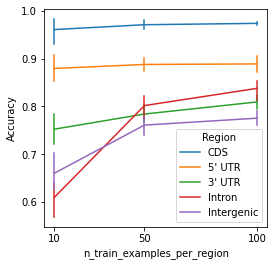

In [405]:
plt.figure(figsize=(4, 4))
sns.lineplot(
    data=results,
    x="n_train_examples_per_region",
    y="Accuracy",
    hue="Region",
    hue_order=region_order,
    err_style="bars",
)
plt.xticks(n_trains)
plt.savefig("accuracy.svg", bbox_inches="tight");

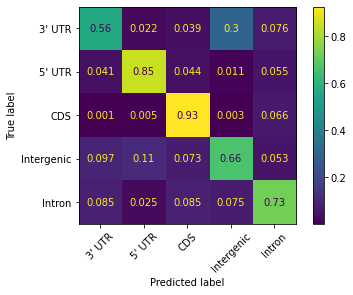

In [369]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

plt.xticks(rotation=45);

In [373]:
#np.unique(y_test)

array(["3' UTR", "5' UTR", 'CDS', 'Intergenic', 'Intron'], dtype=object)

In [370]:
#cm = confusion_matrix(y_test, y_pred, normalize='true')
#cm

array([[0.563, 0.022, 0.039, 0.3  , 0.076],
       [0.041, 0.849, 0.044, 0.011, 0.055],
       [0.001, 0.005, 0.925, 0.003, 0.066],
       [0.097, 0.114, 0.073, 0.663, 0.053],
       [0.085, 0.025, 0.085, 0.075, 0.73 ]])

In [371]:
#cm.diagonal()

array([0.563, 0.849, 0.925, 0.663, 0.73 ])

In [308]:
#scores = cross_val_score(clf, X, y, cv=10)
#scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [276]:
# source: https://github.com/MindAI/kmer

class kmer_featurization:

  def __init__(self, k):
    """
    seqs: a list of DNA sequences
    k: the "k" in k-mer
    """
    self.k = k
    self.letters = ['A', 'T', 'C', 'G']
    self.multiplyBy = 4 ** np.arange(k-1, -1, -1) # the multiplying number for each digit position in the k-number system
    self.n = 4**k # number of possible k-mers

  def obtain_kmer_feature_for_a_list_of_sequences(self, seqs, write_number_of_occurrences=False):
    """
    Given a list of m DNA sequences, return a 2-d array with shape (m, 4**k) for the 1-hot representation of the kmer features.
    Args:
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.    
    """
    kmer_features = []
    for seq in seqs:
      this_kmer_feature = self.obtain_kmer_feature_for_one_sequence(seq.upper(), write_number_of_occurrences=write_number_of_occurrences)
      kmer_features.append(this_kmer_feature)

    kmer_features = np.array(kmer_features)

    return kmer_features

  def obtain_kmer_feature_for_one_sequence(self, seq, write_number_of_occurrences=False):
    """
    Given a DNA sequence, return the 1-hot representation of its kmer feature.
    Args:
      seq: 
        a string, a DNA sequence
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.
    """
    number_of_kmers = len(seq) - self.k + 1

    kmer_feature = np.zeros(self.n)

    for i in range(number_of_kmers):
      this_kmer = seq[i:(i+self.k)]
      this_numbering = self.kmer_numbering_for_one_kmer(this_kmer)
      kmer_feature[this_numbering] += 1

    if not write_number_of_occurrences:
      kmer_feature = kmer_feature / number_of_kmers

    return kmer_feature

  def kmer_numbering_for_one_kmer(self, kmer):
    """
    Given a k-mer, return its numbering (the 0-based position in 1-hot representation)
    """
    digits = []
    for letter in kmer:
      digits.append(self.letters.index(letter))

    digits = np.array(digits)

    numbering = (digits * self.multiplyBy).sum()

    return numbering